## This program helps to fit a Mie potential to Sphor model for water metal interaction

###  Sphor Model for Water-Au interaction
\begin{equation}
U_\mathrm{M-Water} = U_\mathrm{M-O} + U_\mathrm{M-H1} + U_\mathrm{M-H2}
\end{equation}
#### Metal - Oxygen interaction:
\begin{equation}
U_\mathrm{M-O}(r) = D_0\left[\exp(-2\beta_O(r-r_\mathrm{e1}))-2\exp(-\beta_O(r-r_\mathrm{e1}))\right]
\end{equation}
#### Metal - Hydrogen interaction:
\begin{equation}
U_\mathrm{M-H} = \gamma D_0 \exp(-2\beta_H(r-r_\mathrm{e2}))
\end{equation}

### The parameters for the Sphor model are:
\begin{eqnarray}
D_0 & = & 6.68\times 10^{-2}\,\mathrm{eV}\\
\beta_O & = & 13.0\,\mathrm{nm^{-1}}\\
\beta_H & = & 13.0\,\mathrm{nm^{-1}}\\
r_\mathrm{e1} & = & 0.37\,\mathrm{nm}\\
r_\mathrm{e2} & = & -0.1\,\mathrm{nm}\\
\gamma & = & 0.2
\end{eqnarray}

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
D0 = 6.68e-2
bo = 13.0 * 0.1 # IN Ang^{-1}
bh = 13.0 * 0.1
re1 = 0.37 * 10 # In Ang
re2 = -0.1 * 10
gamma = 0.2

In [46]:
r = np.linspace(1,7,100000)
r.shape

(100000,)

In [47]:
def sphorO(r):
    return D0 * (np.exp(-2 * bo * (r - re1)) - 2 * np.exp(-bo * (r - re1)))
def sphorH(r):
    return D0 * gamma * np.exp(-2 * bh * (r - re2))

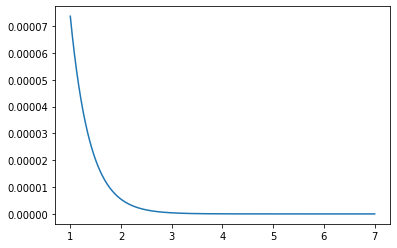

In [48]:
pecO = sphorO(r)
pecH = sphorH(r)
plt.plot(r, pecH)
plt.show()

## Mie Potential
\begin{equation}
U_\mathrm{Mie}(r) = \left(\frac{n}{n-m}\right)\left(\frac{n}{m}\right)^\frac{m}{n-m} \epsilon \left[ \left(\frac{\sigma}{r}\right)^n - \left(\frac{\sigma}{r}\right)^m\right]
\end{equation}

In [38]:
n = 9
m = 6

In [49]:
def Mie(r, e, s):
    return (n/(n-m))* (n/m)**(m/(n-m))* e* ((s/r)**n - (s/r)**m)

def Repulsive(r,sig, p):
    return sig * (1/r)**p

In [40]:
from scipy.optimize import curve_fit

In [50]:
pec_fitO = Mie(r,0.0681344, 3.18284)
pec_fitH = Repulsive(r,0.0000921016,4)

In [25]:
para

NameError: name 'para' is not defined

In [26]:
fitted_pec = Mie(r , para[0], para[1])

NameError: name 'para' is not defined

In [27]:
plt.plot(r, pec)
plt.plot(r, fitted_pec)
plt.show()

NameError: name 'pec' is not defined

In [52]:
file = open("../PtWaterAdsorption/Sphur_tune.dat",'w')
file.write("#r\tsO\tsH\tfO\tfH\n")
for var in range(len(r)):
    file.write("%e\t%e\t%e\t%e\t%e\n"%(r[var],pecO[var],pecH[var],pec_fitO[var],pec_fitH[var]))
file.close()

In [43]:
n=10

m=6
(n/(n-m))* (n/m)**(m/(n-m))

5.37914353639919